In [1]:
import io, os, sys
import requests
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches

sys.path.append('..')

# local library of functions to connect to image server
import calcimetry.use_server as server
from calcimetry.mongo_api import MongoInfo, MongoAPI
from calcimetry.calcimetry_api import CalcimetryAPI

img_path = server.init() 

# parameters where the database is stored, can obviously be distant.
HOST='irlinv-dvbacr16'
PORT=7017
mongo_info = MongoInfo(host=HOST, port=PORT)

# Image Quality

* `Focus` : The variance of the Laplacian can be a measure of the sharpness of the image, or the focus.
* `Gradient` : Magnitude of the gradient to get sharpness of edges, calculate maximum and standard deviation.
* `Colours` : The top five colours in the image from clustering analysis
* `BRISQUE` : blind/referenceless image spatial quality evaluator

In [2]:
df = pd.read_pickle('./BRISQUE_data.pkl')
df = df.reset_index(drop=True)
dfna = df.dropna().copy()
dfna['Normalised Focus'] = dfna['Focus']/np.max(dfna['Focus'])
dfna['Normalised Gradient std'] = dfna['Gradient std']/np.max(dfna['Gradient std'])
dfna['Normalised Gradient max'] = dfna['Gradient max']/np.max(dfna['Gradient max'])
dfna['Normalised BRISQUE index'] = dfna['BRISQUE index']/np.max(dfna['BRISQUE index'])

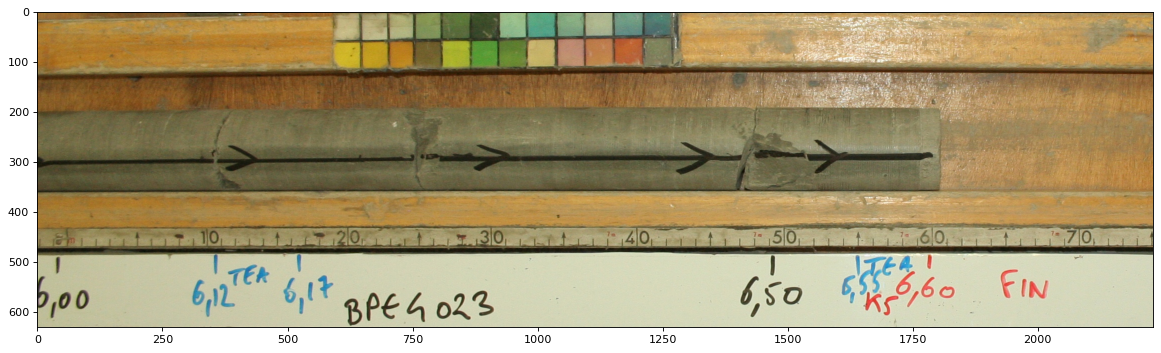

In [3]:
img = server.get_file(dfna['Path'].iloc[0])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)

## Quality by focus and deviation in sharpness of edges 

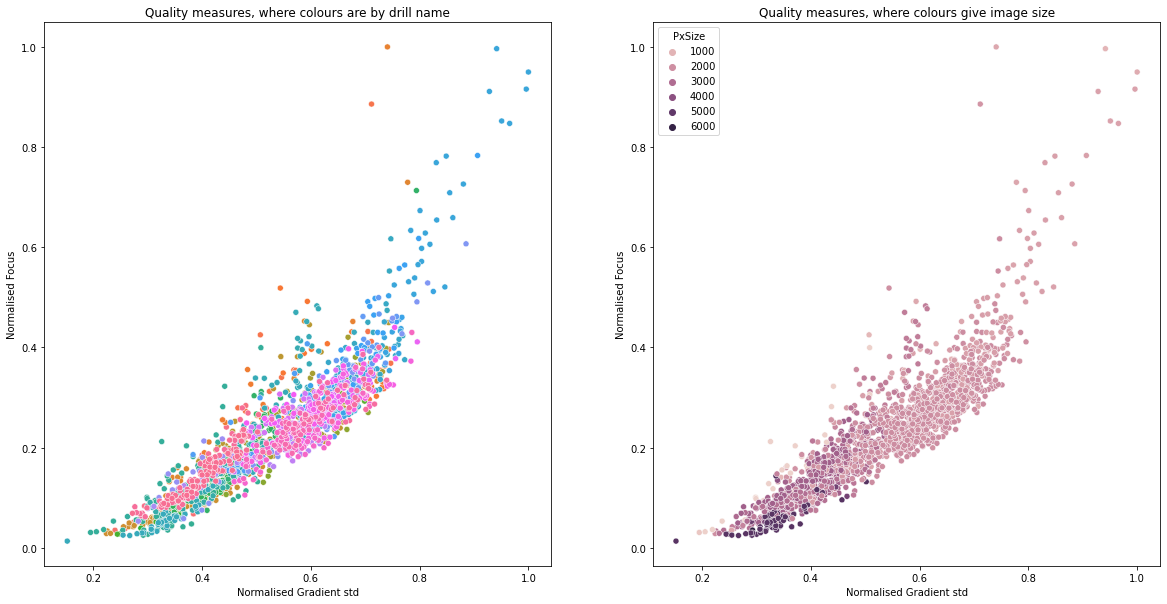

In [4]:
plt.figure(figsize=[20,10])
plt.subplot(121)
ax = sns.scatterplot(data=dfna, x='Normalised Gradient std', y='Normalised Focus', hue='DrillName')
plt.title('Quality measures, where colours are by drill name')
plt.legend([],[], frameon=False)
plt.subplot(122)
ax = sns.scatterplot(data=dfna, x='Normalised Gradient std', y='Normalised Focus', hue='PxSize')
plt.title('Quality measures, where colours give image size')
plt.show()

## Quality by focus and the maximum edge sharpness in an image

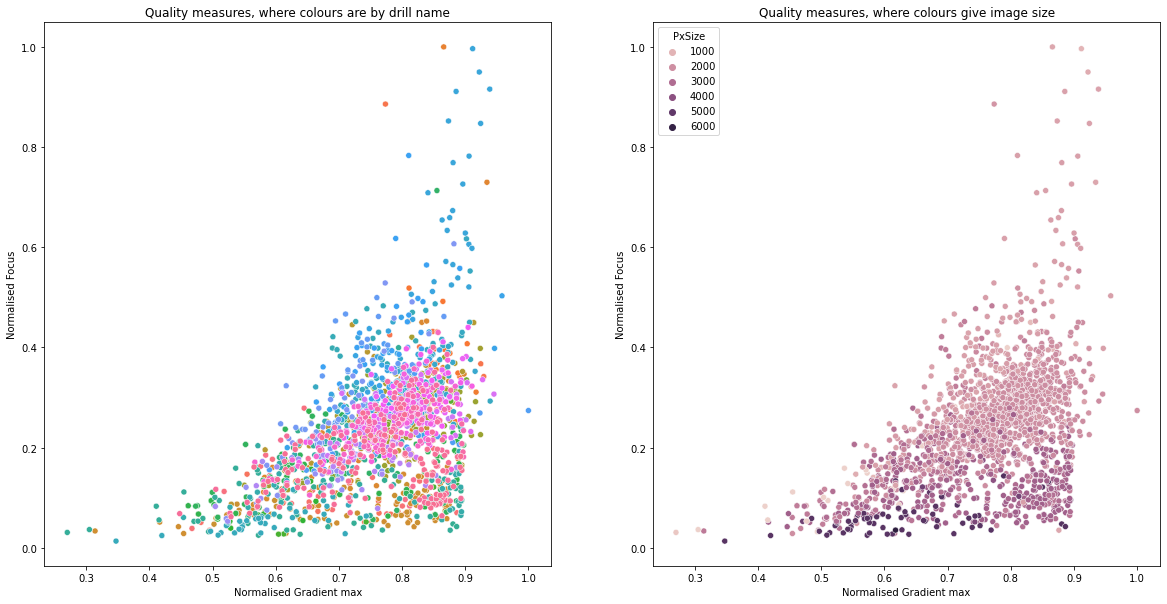

In [5]:
plt.figure(figsize=[20,10])
plt.subplot(121)
ax = sns.scatterplot(data=dfna, x='Normalised Gradient max', y='Normalised Focus', hue='DrillName')
plt.title('Quality measures, where colours are by drill name')
plt.legend([],[], frameon=False)
plt.subplot(122)
ax = sns.scatterplot(data=dfna, x='Normalised Gradient max', y='Normalised Focus', hue='PxSize')
plt.title('Quality measures, where colours give image size')
plt.show()

## Quality by focus and the measure BRISQUE

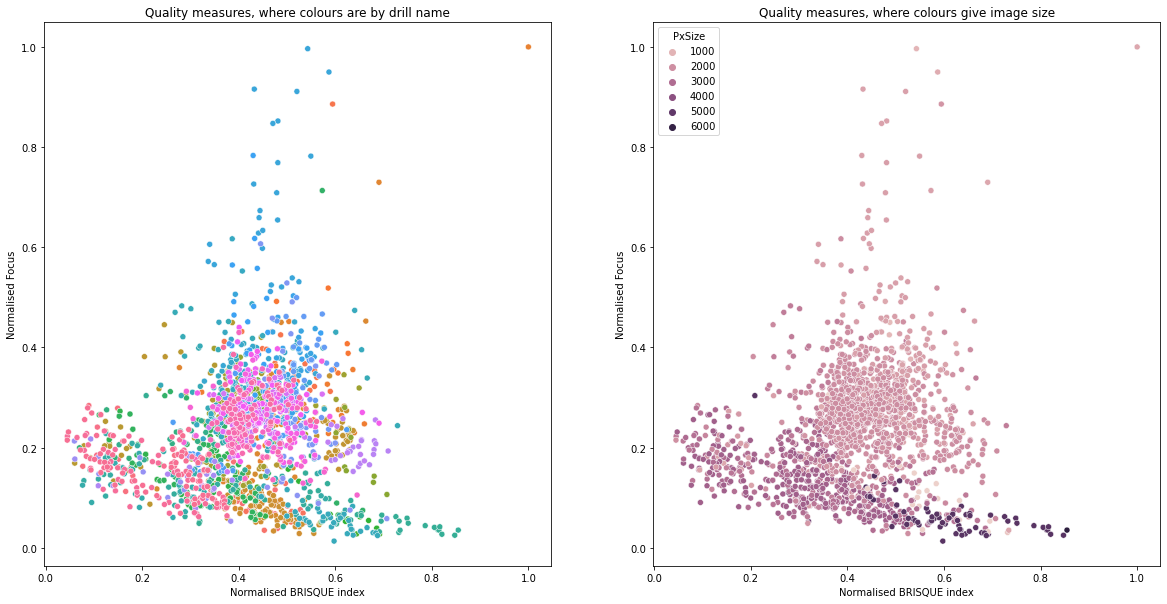

In [6]:
plt.figure(figsize=[20,10])
plt.subplot(121)
ax = sns.scatterplot(data=dfna, x='Normalised BRISQUE index', y='Normalised Focus', hue='DrillName')
plt.title('Quality measures, where colours are by drill name')
plt.legend([],[], frameon=False)
plt.subplot(122)
ax = sns.scatterplot(data=dfna, x='Normalised BRISQUE index', y='Normalised Focus', hue='PxSize')
plt.title('Quality measures, where colours give image size')
plt.show()

# Image with best quality (maximum focus and BRISQUE index)

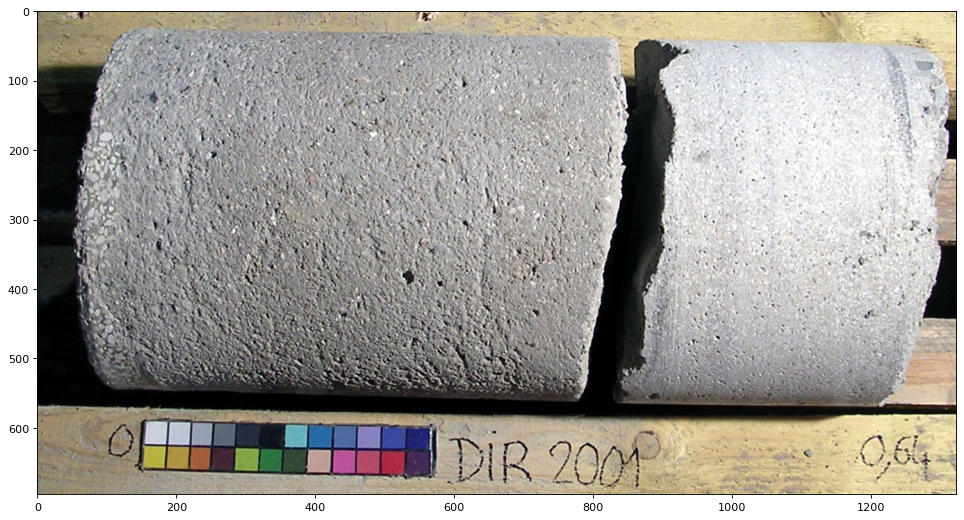

/data/andra/calci_photos/DIR2001/Photos/GTR2005-01_0012_DIR2001_0000_0064.jpg


In [7]:
img = server.get_file(df['Path'][df['Focus'].idxmax()])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)
plt.show()
print(df['Path'][df['Focus'].idxmax()])

## Second best image by BRISQUE index

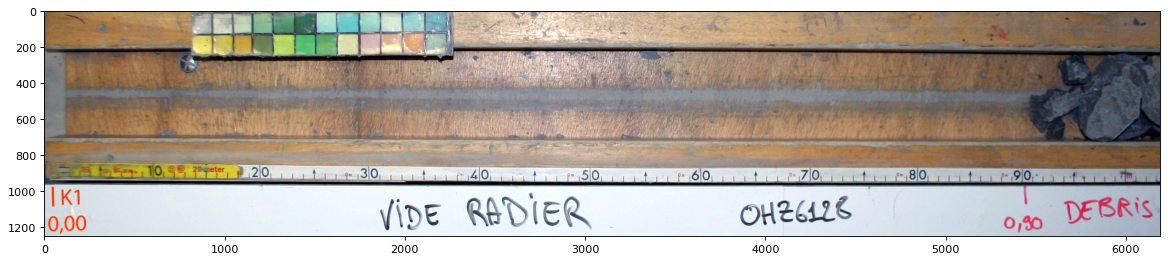

/data/andra/calci_photos/OHZ6128/Photos/GTR2015-04_0010_OHZ6128_0000_0103.jpg


In [8]:
dfbrisque = dfna.sort_values(by=['Normalised BRISQUE index'])
img = server.get_file(dfbrisque['Path'].iloc[-2])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)
plt.show()
print(dfbrisque['Path'].iloc[-2])

## Third best image from BRISQUE index

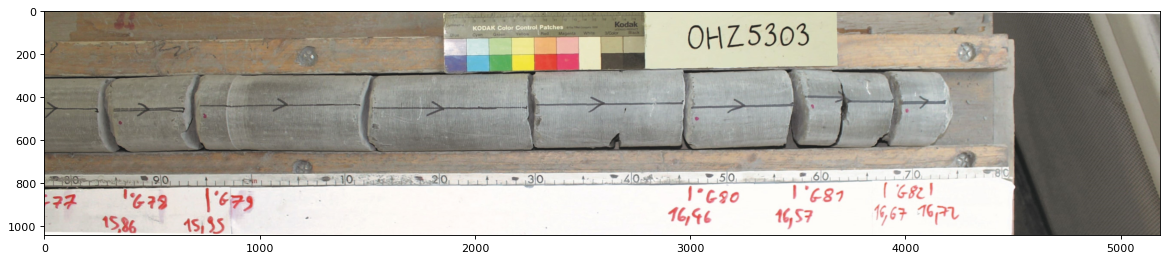

/data/andra/calci_photos/OHZ5303/Photos/GTR2020-02_0003-OHZ5303_1578_1672.jpg


In [9]:
img = server.get_file(dfbrisque['Path'].iloc[-3])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)
plt.show()
print(dfbrisque['Path'].iloc[-3])

# Second best image by focus

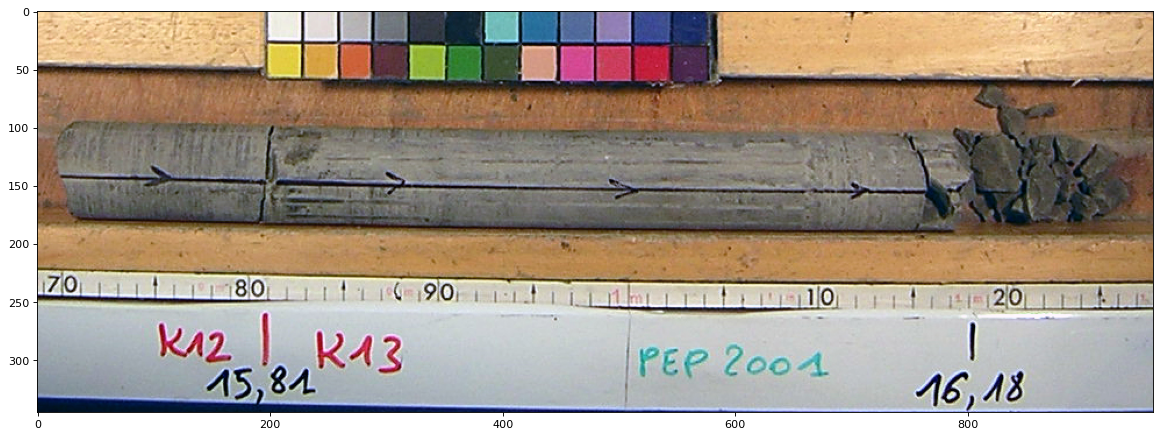

/data/andra/calci_photos/PEP2001/Photos/GTR2004-12_0015_PEP2001_1570_1618.jpg


In [10]:
dfFocus = dfna.sort_values(by=['Normalised Focus'])
img = server.get_file(dfFocus['Path'].iloc[-2])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)
plt.show()
print(dfFocus['Path'].iloc[-2])

# Worst image by focus

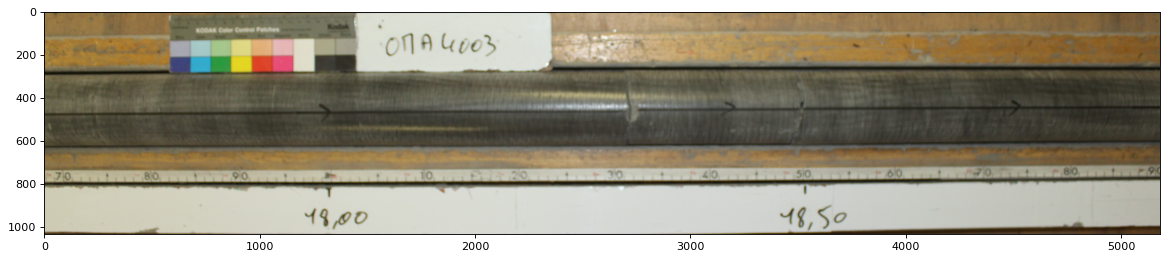

/data/andra/calci_photos/OMA4003/Photos/FUG2020-10_0019-OMA4003_1769_1889.jpg


In [11]:
dfFocus = dfna.sort_values(by=['Normalised Focus'])
img = server.get_file(dfFocus['Path'].iloc[0])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)
plt.show()
print(dfFocus['Path'].iloc[0])

# Worst image by BRISQUE

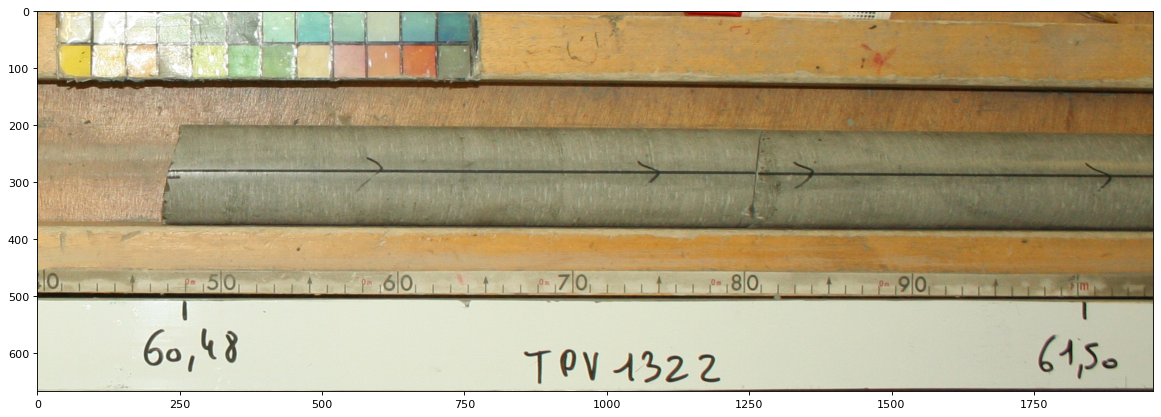

/data/andra/calci_photos/TPV1322/Photos/GTR2012-12_0034_TPV1322_6048_6103.jpg


In [12]:
img = server.get_file(dfbrisque['Path'].iloc[0])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)
plt.show()
print(dfbrisque['Path'].iloc[0])

# Image colours

Below is a plot of the image quality indexes where the each image is plotted by its primary colour. It can be seen that image colour and quality does not cluster significantly. This measure could be used as a starting point as an atribute for classic regression models.

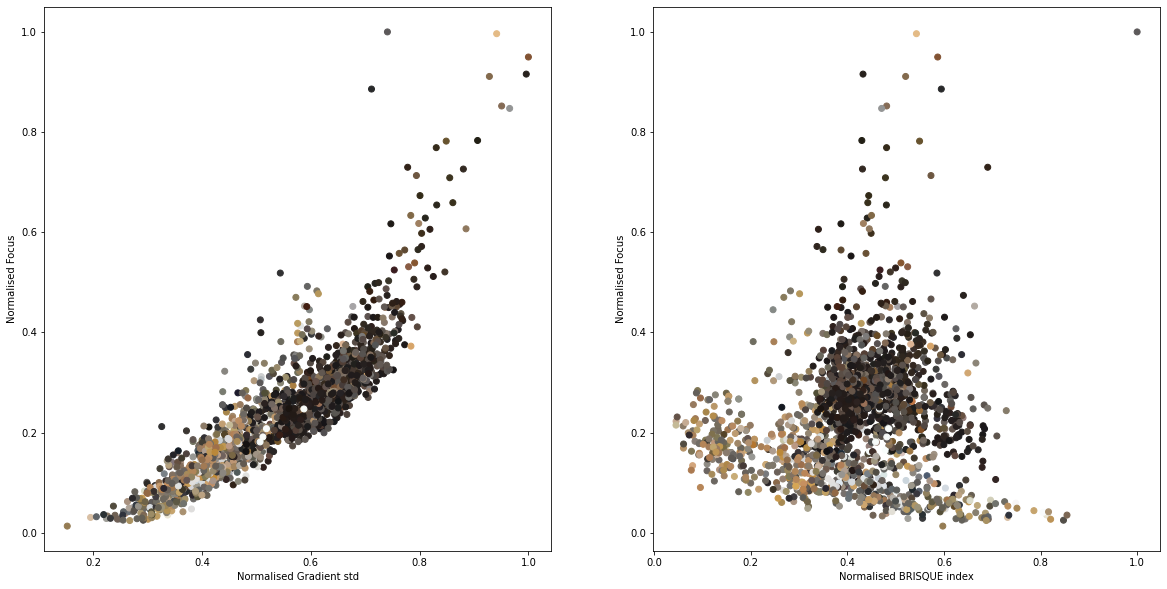

In [13]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.scatter(dfna['Normalised Gradient std'], dfna['Normalised Focus'], c=dfna['Colour1']/255)
plt.xlabel('Normalised Gradient std')
plt.ylabel('Normalised Focus')
plt.subplot(1,2,2)
plt.scatter(dfna['Normalised BRISQUE index'], dfna['Normalised Focus'], c=dfna['Colour1']/255)
plt.xlabel('Normalised BRISQUE index')
plt.ylabel('Normalised Focus')
plt.show()

# Darkest image

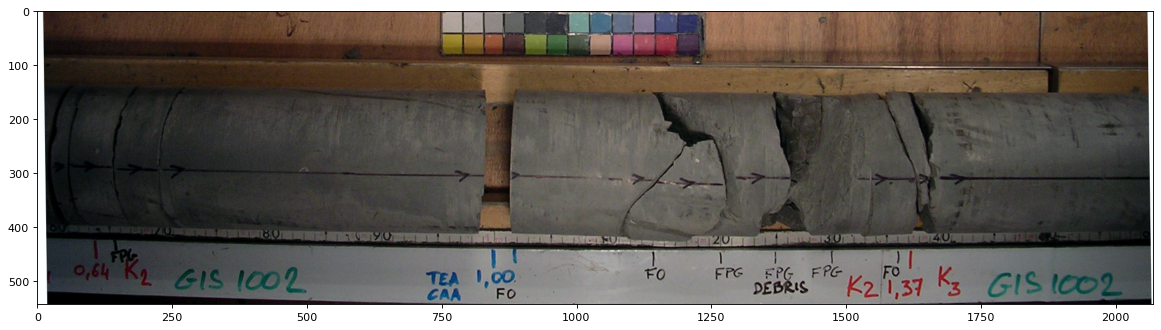

/data/andra/calci_photos/GIS1002/Photos/GTR2005-11_0067_GIS1002_0060_0160.jpg


In [14]:
dfna['darkness'] = np.array(dfna['Colour1'].to_numpy().tolist()).sum(axis=1).tolist()
dfna['darkness'] = dfna['darkness']/np.max(dfna['darkness'])


dfdark = dfna.sort_values(by=['darkness'])
img = server.get_file(dfdark['Path'].iloc[-1])
plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(img)
plt.show()
print(dfdark['Path'].iloc[-1])

In [15]:
drillname = 'GIS1002'
ImageId = 393
with MongoAPI(mongo_info=mongo_info) as mongo_api:
    doc = mongo_api.db['measurements'].find({'ImageId': ImageId})
    df = pd.DataFrame(list(doc))

## Darkest image with calcimetry measurement

Here we see one potential issue, where the point of measurement has been removed from the core. 

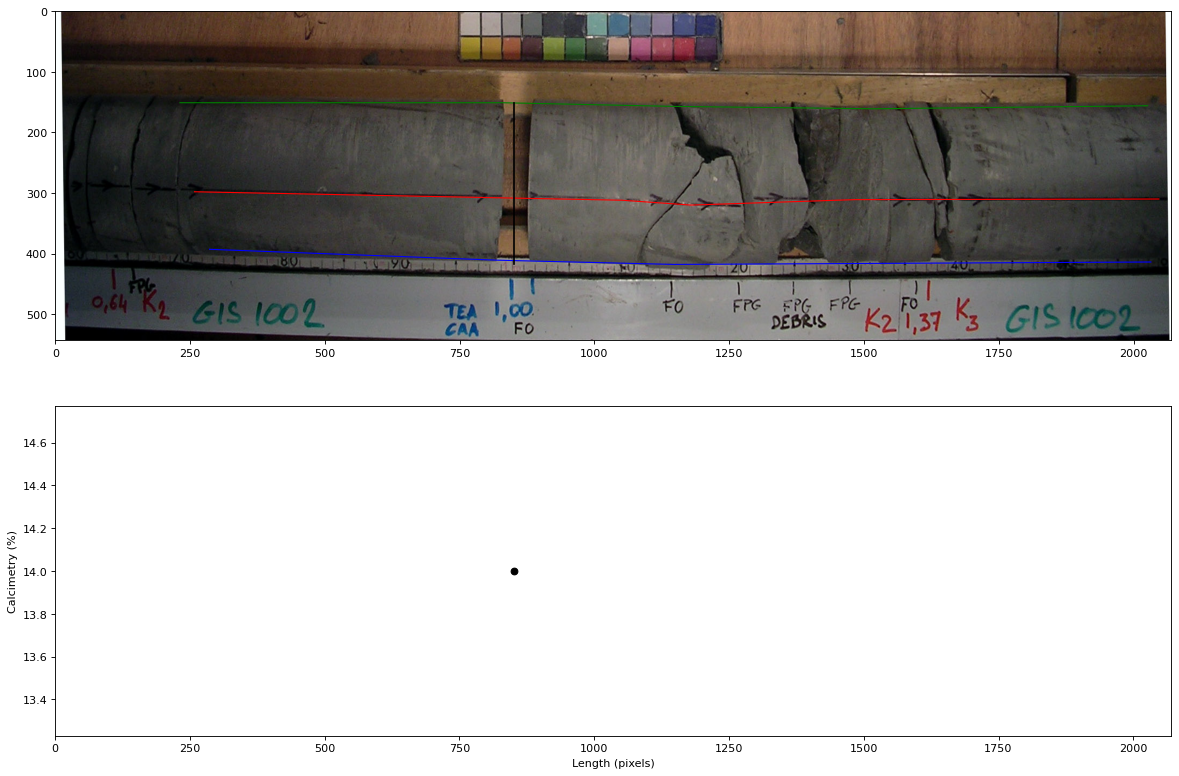

In [16]:
def draw_line(polyline, color='red'):
    x = []
    y = []
    for t in polyline:
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch

with MongoAPI(mongo_info=mongo_info) as mongo_api:
    doc = mongo_api.db['images'].find_one({'ImageId': ImageId})

    if len(doc['k_Up']) > 1:
        top_line = draw_line(doc['k_Up'], color='green')
    if doc['k_Arrow'] is not None:
        arrow_line = draw_line(doc['k_Arrow'], color='red')
    if len(doc['k_Down']) > 1:
        bottom_line = draw_line(doc['k_Down'], color='blue')

    filename = f"/data/andra/calci_photos/{drillname}/Photos/{doc['FileName']}"
    img = server.get_file(filename, quiet=True)

    plt.figure(figsize=(18, 12), dpi=80)
    plt.subplot(211)
    plt.imshow(img, aspect='auto')
    if len(doc['k_Up']) > 1:
        plt.gca().add_patch(top_line)
    if doc['k_Arrow'] is not None:
        plt.gca().add_patch(arrow_line)
    if len(doc['k_Down']) > 1:
        plt.gca().add_patch(bottom_line)
        
    dpxdx = (doc['px1'] - doc['px0']) / (doc['Cote1'] - doc['Cote0'])
        
    for indx, row in df.iterrows():
        if row['ImageId'] == ImageId:
            x = dpxdx * (row['CalciCote'] - doc['Cote0']) + doc['px0']
            y1 = np.array(doc['k_Down']).T[1].max()
            y2 = np.array(doc['k_Up']).T[1].min()
            plt.plot([x, x], [y1, y2], color='black')
    
    plt.subplot(212)
    
    x = []
    y = []
    for indx, row in df.iterrows():
        if row['ImageId'] == ImageId:
            x.append(dpxdx * (row['CalciCote'] - doc['Cote0']) + doc['px0'])
            y.append(row['CalciVals1m'])
    plt.plot(x, y, marker='o', color='black')
    plt.xlim(0, np.shape(img)[1])
    plt.ylabel('Calcimetry (%)')
    plt.xlabel('Length (pixels)')

# Criterea for poor image

* Low score on focus
* Wrong primary colour (too much wood)
* Image metrics developed for video streaming (BRISQUE) are independent of resolution (maybe)
* Colour metric will be usefull when selecting a window on the core (?)